In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [2]:
df_nasabah = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Collection and Loss Reverse Forecast\data\data_nasabah.csv")
df_nasabah.head(5)

,Unnamed: 0,debtor_name,debtor_nik,debtor_address,debtor_number,debtor_company,debtor_gender,age,debtor_education_level,debtor_martial_status,...,arrears4,arrears5,arrears6,arrears7,arrears8,arrears9,arrears10,arrears11,arrears12,aging
0,0,Miguel Cobb,5.792715e+15,"Jl. PHH. Mustofa No. 98\nBengkulu, NT 99942",+62 (073) 868-0507,PT Jennings,Wanita,80,D3,Sudah menikah,...,0,0,0,0,0,0,0,0,0,DPK
1,1,Michael Johnson,2.123166e+15,"Jl. Ir. H. Djuanda No. 08\nPariaman, JB 52138",+62 (0289) 223-8634,PD Galloway (Persero) Tbk,Pria,44,D3,Sudah menikah,...,0,0,0,0,0,0,0,1,0,DPK
2,2,Alexandra Duke,5.833465e+15,"Jalan HOS. Cokroaminoto No. 29\nBitung, DI Yog...",+62 (82) 889 2857,UD Levy (Persero) Tbk,Pria,35,D2,Sudah menikah,...,0,0,0,0,0,0,0,0,0,Lancar
3,3,Sandra Edwards,2.232762e+15,"Jalan Kebonjati No. 029\nLhokseumawe, KI 72214",(0917) 475-7121,PD Browning Williams (Persero) Tbk,Wanita,53,D2,Sudah menikah,...,0,0,0,0,1,0,0,0,0,DPK
4,4,Terrence Carrillo,1.797443e+15,"Gang Sukajadi No. 725\nBekasi, BE 38380",+62 (0656) 200 2688,Perum Roy Figueroa Tbk,Pria,24,SMA,Sudah menikah,...,0,0,0,0,0,0,0,0,0,DPK


In [3]:
df_nasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  5000 non-null   int64  
 1   debtor_name                 5000 non-null   object 
 2   debtor_nik                  5000 non-null   float64
 3   debtor_address              5000 non-null   object 
 4   debtor_number               5000 non-null   object 
 5   debtor_company              5000 non-null   object 
 6   debtor_gender               5000 non-null   object 
 7   age                         5000 non-null   int64  
 8   debtor_education_level      5000 non-null   object 
 9   debtor_martial_status       5000 non-null   object 
 10  employment_type             5000 non-null   object 
 11  number_of_dependents        5000 non-null   int64  
 12  net_income                  5000 non-null   float64
 13  payment_date                5000 

In [4]:
for i in df_nasabah.columns:
    if df_nasabah[i].dtype == "object":
        df_nasabah[i] = df_nasabah[i].astype("category")

In [5]:
df_nasabah.head(5)

,Unnamed: 0,debtor_name,debtor_nik,debtor_address,debtor_number,debtor_company,debtor_gender,age,debtor_education_level,debtor_martial_status,...,arrears4,arrears5,arrears6,arrears7,arrears8,arrears9,arrears10,arrears11,arrears12,aging
0,0,Miguel Cobb,5.792715e+15,"Jl. PHH. Mustofa No. 98\nBengkulu, NT 99942",+62 (073) 868-0507,PT Jennings,Wanita,80,D3,Sudah menikah,...,0,0,0,0,0,0,0,0,0,DPK
1,1,Michael Johnson,2.123166e+15,"Jl. Ir. H. Djuanda No. 08\nPariaman, JB 52138",+62 (0289) 223-8634,PD Galloway (Persero) Tbk,Pria,44,D3,Sudah menikah,...,0,0,0,0,0,0,0,1,0,DPK
2,2,Alexandra Duke,5.833465e+15,"Jalan HOS. Cokroaminoto No. 29\nBitung, DI Yog...",+62 (82) 889 2857,UD Levy (Persero) Tbk,Pria,35,D2,Sudah menikah,...,0,0,0,0,0,0,0,0,0,Lancar
3,3,Sandra Edwards,2.232762e+15,"Jalan Kebonjati No. 029\nLhokseumawe, KI 72214",(0917) 475-7121,PD Browning Williams (Persero) Tbk,Wanita,53,D2,Sudah menikah,...,0,0,0,0,1,0,0,0,0,DPK
4,4,Terrence Carrillo,1.797443e+15,"Gang Sukajadi No. 725\nBekasi, BE 38380",+62 (0656) 200 2688,Perum Roy Figueroa Tbk,Pria,24,SMA,Sudah menikah,...,0,0,0,0,0,0,0,0,0,DPK


In [6]:
df_nasabah.isnull().sum()

Unnamed: 0        0
debtor_name       0
debtor_nik        0
debtor_address    0
debtor_number     0
                 ..
arrears9          0
arrears10         0
arrears11         0
arrears12         0
aging             0
Length: 61, dtype: int64

In [7]:
df_nasabah.dropna(inplace=True)

In [8]:
df_nasabah.duplicated().sum()

0

In [9]:
df_nasabah.describe(include="number")

,Unnamed: 0,debtor_nik,age,number_of_dependents,net_income,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,...,arrears3,arrears4,arrears5,arrears6,arrears7,arrears8,arrears9,arrears10,arrears11,arrears12
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,5.475233e+15,48.919600,3.086000,1.598885e+07,1.639942e+07,1.559160e+07,1.161858e+07,69.656600,4.494400,...,0.259000,0.272200,0.285000,0.263000,0.277800,0.271400,0.252000,0.259600,0.274800,0.263800
std,1443.520003,2.571450e+15,18.068559,1.340509,5.932670e+06,6.014393e+06,9.158749e+06,7.237095e+06,47.851364,2.839785,...,0.576876,0.608754,0.643007,0.630484,0.636167,0.640487,0.592762,0.599566,0.630686,0.629197
min,0.000000,1.001158e+15,18.000000,0.000000,2.000000e+05,3.125000e+06,5.000000e+05,2.500000e+05,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1249.750000,3.264642e+15,33.000000,2.000000,1.150000e+07,1.408333e+07,8.500000e+06,5.950000e+06,30.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2499.500000,5.460654e+15,49.000000,3.000000,1.550000e+07,1.512500e+07,1.400000e+07,1.025000e+07,62.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3749.250000,7.678701e+15,64.000000,4.000000,1.900000e+07,1.670833e+07,2.100000e+07,1.580000e+07,105.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4999.000000,9.998640e+15,80.000000,7.000000,3.600000e+07,4.291667e+07,3.950000e+07,3.915000e+07,246.000000,12.000000,...,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,5.000000,5.000000,5.000000,6.000000


In [10]:
# Drop unnamed column
df_nasabah.drop(["Unnamed: 0",
                 "payment1", "payment2", "payment3", "payment4", "payment5", "payment6",
                 "payment7", "payment8", "payment9", "payment10", "payment11", "payment12",
                 "bil1_late1", "bill_late2", "bill_late3", "bill_late4", "bill_late5", "bill_late6",
                 "bill_late7", "bill_late8", "bill_late9", "bill_late10", "bill_late11", "bill_late12",
                 "arrears1", "arrears2", "arrears3", "arrears4", "arrears5", "arrears6", "arrears7",
                 "arrears8", "arrears9", "arrears10", "arrears11", "arrears12"], axis=1, inplace=True)

In [11]:
df_nasabah.shape

(5000, 24)

In [12]:
df_nasabah.describe(exclude=["number", "datetime"]).T

,count,unique,top,freq
debtor_name,5000,5000,Aaron Avila,1
debtor_address,5000,5000,"Gang Abdul Muis No. 16\nLubuklinggau, Nusa Ten...",1
debtor_number,5000,5000,(000) 158 8846,1
debtor_company,5000,4520,PD Johnson,9
debtor_gender,5000,2,Pria,2993
debtor_education_level,5000,9,S1,1214
debtor_martial_status,5000,2,Sudah menikah,4123
employment_type,5000,7,Retired,2435
payment_date,5000,265,2023-03-14,29
credit_risk,5000,2,Tidak tertagih,2775


In [13]:
# Drop address, no_telp, name, email, and job

df_nasabah.drop(labels=["debtor_nik", "debtor_name", "debtor_address", "debtor_number", "debtor_company"], axis=1, inplace=True)

In [14]:
df_nasabah.head(5)

,debtor_gender,age,debtor_education_level,debtor_martial_status,employment_type,number_of_dependents,net_income,payment_date,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,credit_risk,credit_score,arrears_amounts,aset,loss_reverse,aging
0,Wanita,80,D3,Sudah menikah,Retired,3,15500000.0,2023-04-18,1.562500e+07,29500000,24350000,2,1,Tertagih,670,0,11000000,0.000000e+00,DPK
1,Pria,44,D3,Sudah menikah,Full-time,3,17500000.0,2023-08-26,1.770833e+07,3000000,1600000,31,3,Tertagih,402,1,17000000,1.770833e+07,DPK
2,Pria,35,D2,Sudah menikah,Full-time,4,17500000.0,2023-08-03,1.483333e+07,13500000,9050000,0,0,Tertagih,505,0,14500000,0.000000e+00,Lancar
3,Wanita,53,D2,Sudah menikah,Retired,3,15500000.0,2023-07-02,1.529167e+07,10500000,8350000,64,5,Tertagih,508,1,11500000,1.529167e+07,DPK
4,Pria,24,SMA,Sudah menikah,Contract,5,8700000.0,2023-09-10,1.404167e+07,6500000,5750000,14,2,Tertagih,371,0,5500000,0.000000e+00,DPK


In [15]:
df_nasabah.shape

(5000, 19)

In [16]:

category = df_nasabah.describe(exclude=["number", "datetime"]).T
category["dtypes"] = df_nasabah.dtypes
category

,count,unique,top,freq,dtypes
debtor_gender,5000,2,Pria,2993,category
debtor_education_level,5000,9,S1,1214,category
debtor_martial_status,5000,2,Sudah menikah,4123,category
employment_type,5000,7,Retired,2435,category
payment_date,5000,265,2023-03-14,29,category
credit_risk,5000,2,Tidak tertagih,2775,category
aging,5000,5,DPK,3155,category


In [17]:
# Scaling category variable
columns = {}
for i in df_nasabah.columns:
    if df_nasabah[i].dtype == "category":
        columns[i] = LabelEncoder().fit(df_nasabah[i])
        df_nasabah[i] = columns[i].transform(df_nasabah[i])
df_nasabah.head(5)

,debtor_gender,age,debtor_education_level,debtor_martial_status,employment_type,number_of_dependents,net_income,payment_date,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,credit_risk,credit_score,arrears_amounts,aset,loss_reverse,aging
0,1,80,2,1,5,3,15500000.0,107,1.562500e+07,29500000,24350000,2,1,0,670,0,11000000,0.000000e+00,0
1,0,44,2,1,1,3,17500000.0,237,1.770833e+07,3000000,1600000,31,3,0,402,1,17000000,1.770833e+07,0
2,0,35,1,1,1,4,17500000.0,214,1.483333e+07,13500000,9050000,0,0,0,505,0,14500000,0.000000e+00,3
3,1,53,1,1,5,3,15500000.0,182,1.529167e+07,10500000,8350000,64,5,0,508,1,11500000,1.529167e+07,0
4,0,24,7,1,0,5,8700000.0,252,1.404167e+07,6500000,5750000,14,2,0,371,0,5500000,0.000000e+00,0


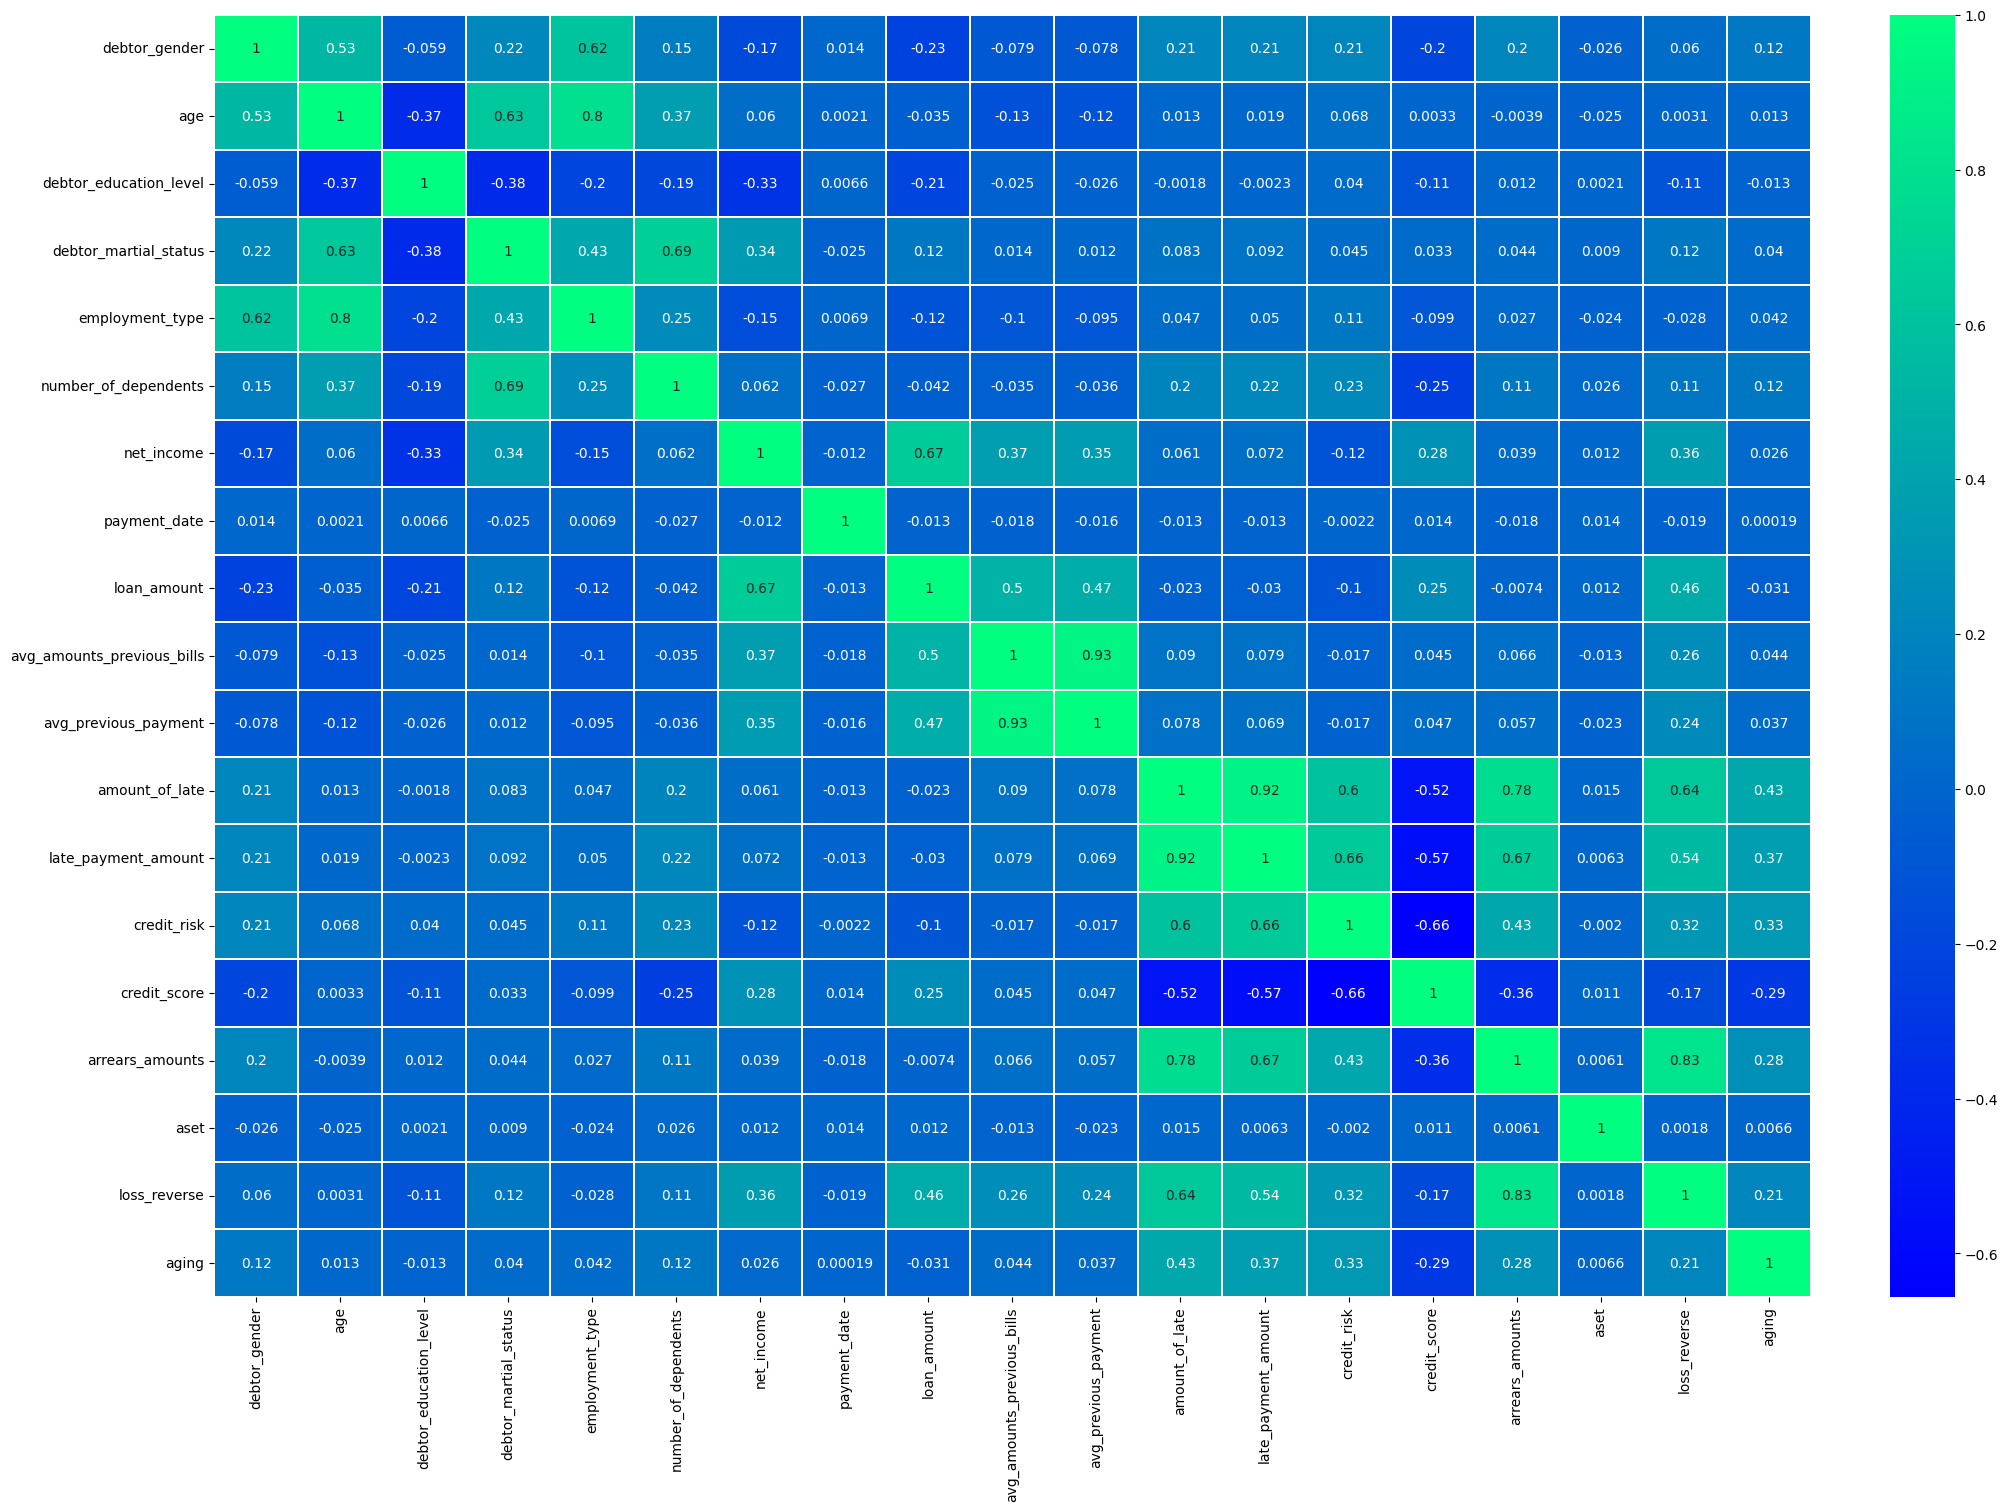

In [18]:
fig, ax = plt.subplots(figsize=(20, 15), layout="constrained")
sns.heatmap(data=df_nasabah.corr(), annot=True, linewidths=.2, linecolor="white", cmap="winter", ax=ax)
plt.show()

In [19]:
for i in columns:
    df_nasabah[i] = columns[i].inverse_transform(df_nasabah[i])

df_nasabah.head(5)

,debtor_gender,age,debtor_education_level,debtor_martial_status,employment_type,number_of_dependents,net_income,payment_date,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,credit_risk,credit_score,arrears_amounts,aset,loss_reverse,aging
0,Wanita,80,D3,Sudah menikah,Retired,3,15500000.0,2023-04-18,1.562500e+07,29500000,24350000,2,1,Tertagih,670,0,11000000,0.000000e+00,DPK
1,Pria,44,D3,Sudah menikah,Full-time,3,17500000.0,2023-08-26,1.770833e+07,3000000,1600000,31,3,Tertagih,402,1,17000000,1.770833e+07,DPK
2,Pria,35,D2,Sudah menikah,Full-time,4,17500000.0,2023-08-03,1.483333e+07,13500000,9050000,0,0,Tertagih,505,0,14500000,0.000000e+00,Lancar
3,Wanita,53,D2,Sudah menikah,Retired,3,15500000.0,2023-07-02,1.529167e+07,10500000,8350000,64,5,Tertagih,508,1,11500000,1.529167e+07,DPK
4,Pria,24,SMA,Sudah menikah,Contract,5,8700000.0,2023-09-10,1.404167e+07,6500000,5750000,14,2,Tertagih,371,0,5500000,0.000000e+00,DPK


In [20]:
df_nasabah.to_csv("nasabah_clean.csv")